# Installs

In [1]:
#
# FAISS has to be installed from conda: we need CondaColab
#
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [2]:
#
# Install FAISS
#
!conda install pytorch::faiss-gpu

Channels:
 - conda-forge
 - pytorch
Platform: linux-64
Solving environment: | / - \ done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.7.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.



In [3]:
#
# cd to the DiRe install directory
#
%cd drive/MyDrive/Colab\ Notebooks/DiRe

/content/drive/MyDrive/Colab Notebooks/DiRe


In [4]:
#
# Installing DiRe requirements
#
!pip install -r requirements_gpu.txt

In [5]:
#
# Benchmark-specific installs
#
!pip install CytofDR
!pip install PyCytoData
!pip install umap-learn
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

fatal: destination path 'rapidsai-csp-utils' already exists and is not an empty directory.
Installing the rest of the RAPIDS 24.4.* libraries
Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com

        ***********************************************************************
        The pip install of RAPIDS is complete.
        
        Please do not run any further installation from the conda based installation methods, as they may cause issues!
        
        Please ensure that you're pulling from the git repo to remain updated with the latest working install scripts.

        Troubleshooting:
            - If there is an installation failure, please check back on RAPIDSAI owned templates/notebooks to see how to update your personal files. 
            - If an installation failure persists when using the latest script, please make an issue on https://github.com/rapidsai-community/rapidsai-csp-utils
        ***********************************************************

# Imports

In [1]:
#
# cd to the DiRe install directory
#
%cd drive/MyDrive/Colab\ Notebooks/DiRe

/content/drive/MyDrive/Colab Notebooks/DiRe


In [2]:
#
# Imports
#
from dire import *
from hpmetrics import *
from dire_utils import *
from jax import random

In [3]:
#
# Benchmark-specific imports
#
from umap import UMAP
from cuml import UMAP as cUMAP
from cuml import TSNE as cTSNE
from PyCytoData import DataLoader

No 'saucie' implementation.
No 'ZIFA' implementation.
No 'Grandprix' implementation.


In [4]:
#
# Plotly settings: either interactive images or stills
#
import plotly.io as pio
#pio.renderers.default = 'colab' # interactive plots
pio.renderers.default = 'png'    # stills

In [5]:
#
# Suppress non-essential warnings
#
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Benchmarking

## Dataset: "Blobs"

### DiRe reducer

In [6]:
from sklearn.datasets import make_blobs
#
# Generate point blobs
#
n_samples  = 100_000
n_features = 1_000
n_centers  = 12
features_blobs, labels_blobs = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_centers, random_state=42)
#

In [7]:
reducer_blobs = DiRe(dimension=2,
                     n_neighbors=25,
                     init_embedding_type='random',
                     max_iter_layout=64,
                     min_dist=1e-4,
                     spread=1.0,
                     cutoff=4.0,
                     n_sample_dirs=8,
                     sample_size=16,
                     neg_ratio=16,
                     verbose=False,)

100%|██████████| 64/64 [00:08<00:00,  7.89it/s]


Embedding time: 16.1771 seconds


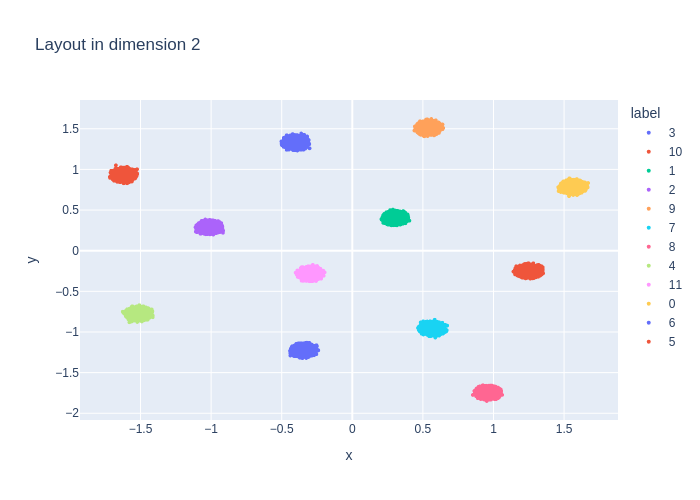

Subsampling data ...
done
Computing persistence up to dimension 1...
done
Computing Betti curve for dimension 0 ...
done


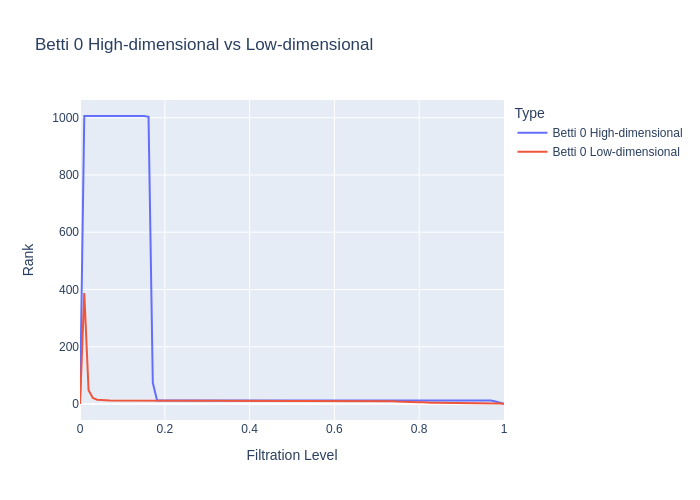

Distance (DTW) for dimension 0: 2.296837334251389
Distance (TWED) for dimension 0: 0.14043913470203853
Distance (EMD) for dimension 0: 2.411830426172617
Computing Betti curve for dimension 1 ...
done


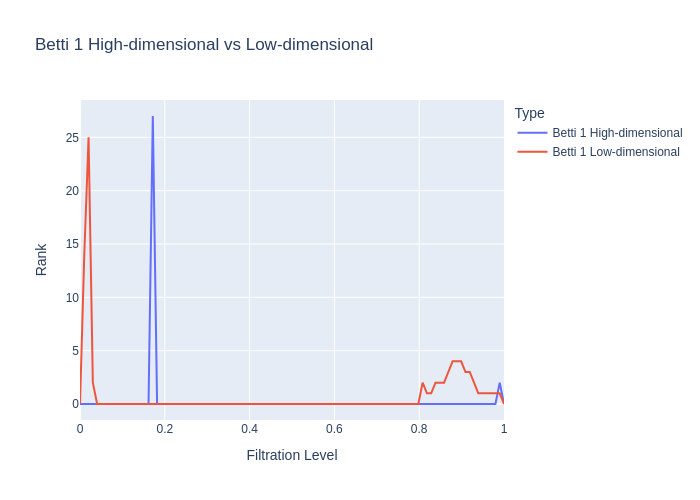

Distance (DTW) for dimension 1: 1.2857521639041662
Distance (TWED) for dimension 1: 0.00996782312055876
Distance (EMD) for dimension 1: 0.22446174195229213
Embedding stress (scaling adjusted): 2.0148292807596566
Neighborhood preservation (mean, std): (0.0010271816281601787, 0.006429651286453009)


In [8]:
run_benchmark(reducer_blobs,
              features_blobs,
              labels_blobs,
              subsample_threshold=0.1,
              rng_key=random.PRNGKey(42),
              point_size=4)

### CuML tSNE reducer

[W] [14:38:16.073613] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...
Embedding time: 30.8662 seconds


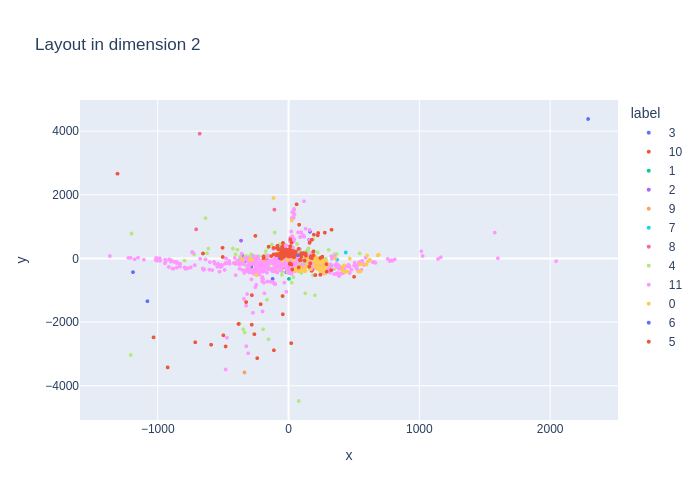

Subsampling data ...
done
Computing persistence up to dimension 1...
done
Computing Betti curve for dimension 0 ...
done


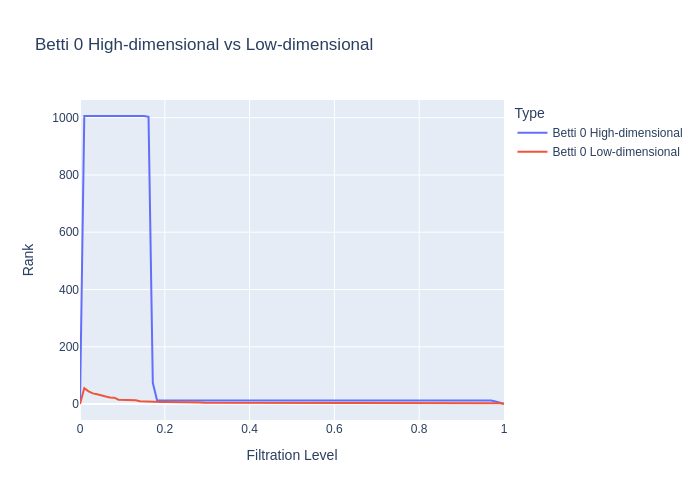

Distance (DTW) for dimension 0: 1.9217482981077452
Distance (TWED) for dimension 0: 0.21781460188592744
Distance (EMD) for dimension 0: 41.65246617297028
Computing Betti curve for dimension 1 ...
done


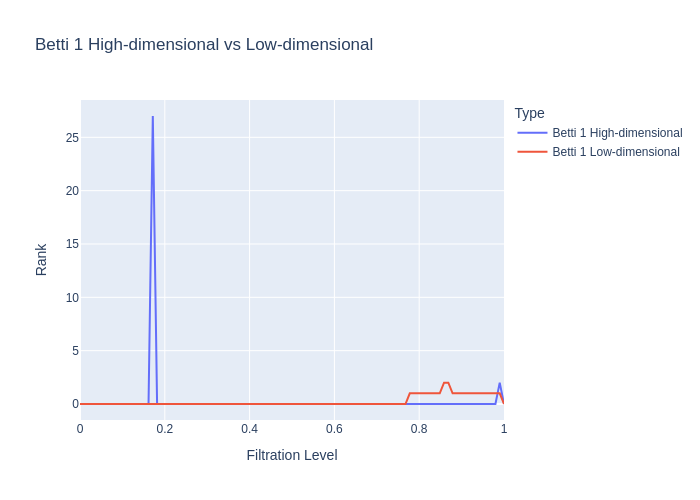

Distance (DTW) for dimension 1: 0.457521111121979
Distance (TWED) for dimension 1: 0.010822799811409217
Distance (EMD) for dimension 1: 0.45775383526669067
Embedding stress (scaling adjusted): 3.1292571016463153
Neighborhood preservation (mean, std): (0.0003950022510252893, 0.003636511042714119)


In [9]:
tred_blobs = cTSNE(n_components=2,
                   method='fft',
                   perplexity=reducer_blobs.n_neighbors,
                   n_neighbors=3*reducer_blobs.n_neighbors+1)
#
run_benchmark(tred_blobs,
              features_blobs,
              labels_blobs,
              subsample_threshold=0.1,
              rng_key=random.PRNGKey(42),
              point_size=4)

### CuML UMAP reducer

Embedding time: 29.0707 seconds


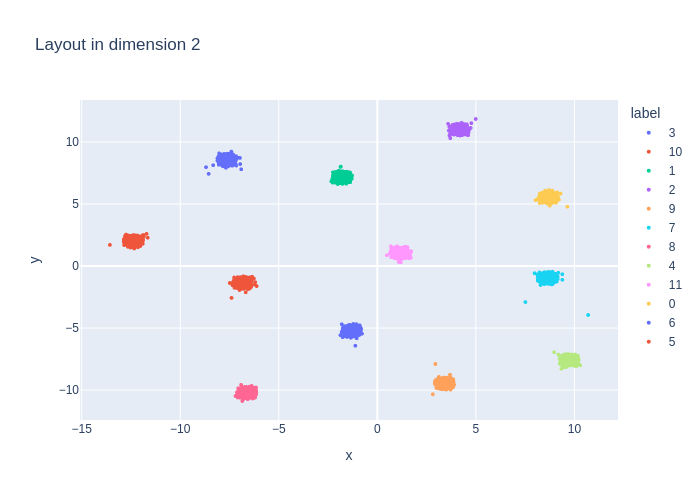

Subsampling data ...
done
Computing persistence up to dimension 1...
done
Computing Betti curve for dimension 0 ...
done


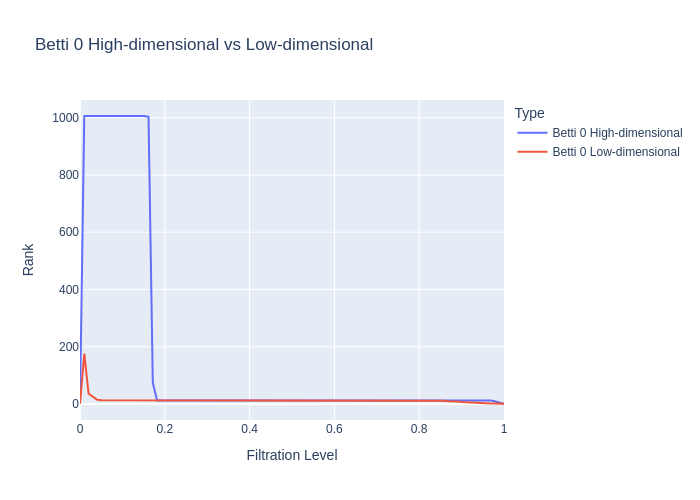

Distance (DTW) for dimension 0: 2.643587758827771
Distance (TWED) for dimension 0: 0.1841856536374598
Distance (EMD) for dimension 0: 2.3700523376290326
Computing Betti curve for dimension 1 ...
done


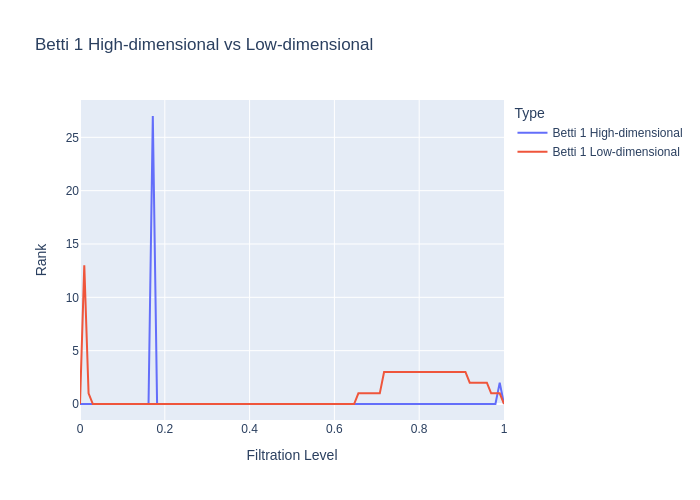

Distance (DTW) for dimension 1: 1.2031770080955233
Distance (TWED) for dimension 1: 0.011753361324788674
Distance (EMD) for dimension 1: 0.16947050674366745
Embedding stress (scaling adjusted): 2.380509198741088
Neighborhood preservation (mean, std): (0.0005095633678138256, 0.004541491158306599)


In [10]:
cured_blobs = cUMAP(n_components=reducer_blobs.dimension,
                    n_neighbors=reducer_blobs.n_neighbors,
                    min_dist=reducer_blobs.min_dist,
                    spread=reducer_blobs.spread)
#
run_benchmark(cured_blobs,
              features_blobs,
              labels_blobs,
              subsample_threshold=0.1,
              rng_key=random.PRNGKey(42),
              point_size=4)

## Dataset "MNIST Digits"

In [12]:
from sklearn.datasets import fetch_openml
# Loading the full MNIST dataset
mnist = fetch_openml('mnist_784', version=1, parser='auto')

In [13]:
features_mnist, labels_mnist = np.array(mnist['data'], dtype=np.float32), mnist['target'].astype(int)
features_mnist = features_mnist / 255.0 - 0.5
features_mnist = np.arcsin(features_mnist)

### DiRe reducer

In [14]:
reducer_mnist = DiRe(dimension=2,
                     n_neighbors=128,
                     init_embedding_type='random',
                     max_iter_layout=64,
                     min_dist=1e-2,
                     spread=1.0,
                     cutoff=24.0,
                     n_sample_dirs=8,
                     sample_size=16,
                     neg_ratio=16,
                     verbose=False,)

100%|██████████| 64/64 [00:07<00:00,  9.02it/s]


Embedding time: 11.2536 seconds


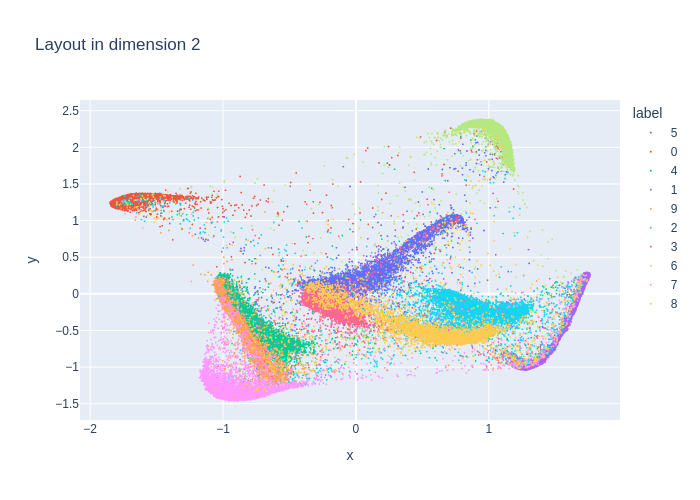

Subsampling data ...
done
Computing persistence up to dimension 1...
done
Computing Betti curve for dimension 0 ...
done


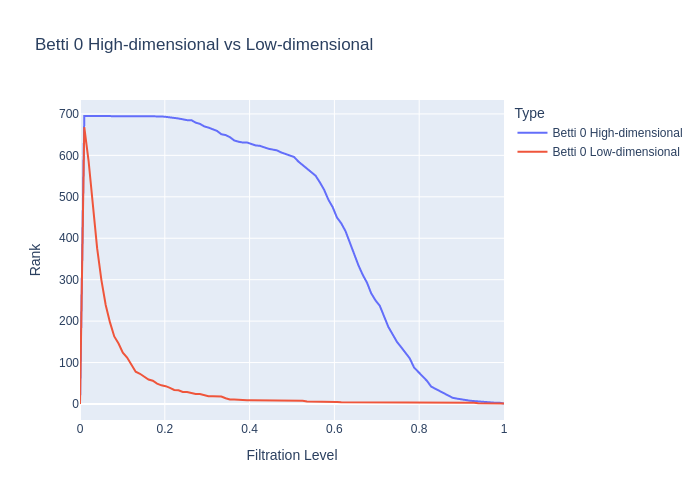

Distance (DTW) for dimension 0: 0.3516394693804944
Distance (TWED) for dimension 0: 0.14120061282934618
Distance (EMD) for dimension 0: 0.01823417198963032
Computing Betti curve for dimension 1 ...
done


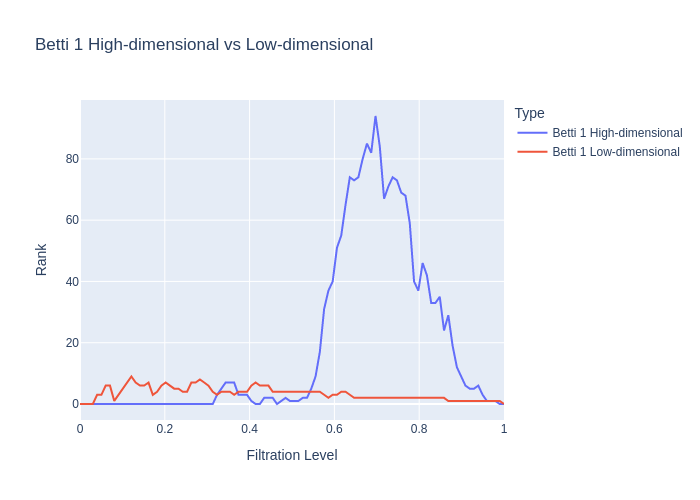

Distance (DTW) for dimension 1: 0.29747480760331435
Distance (TWED) for dimension 1: 0.061883659888292454
Distance (EMD) for dimension 1: 0.042584503728721544
Embedding stress (scaling adjusted): 2.708439646934062
Neighborhood preservation (mean, std): (0.009863483719527721, 0.012835897505283356)


In [15]:
run_benchmark(reducer_mnist,
              features_mnist,
              labels_mnist,
              subsample_threshold=0.1,
              rng_key=random.PRNGKey(42),
              point_size=2)

### CuML tSNE reducer

[W] [14:42:33.538259] Perplexity should be within ranges (5, 50). Your results might be a bit strange...
[W] [14:42:33.538358] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...
Embedding time: 9.6074 seconds


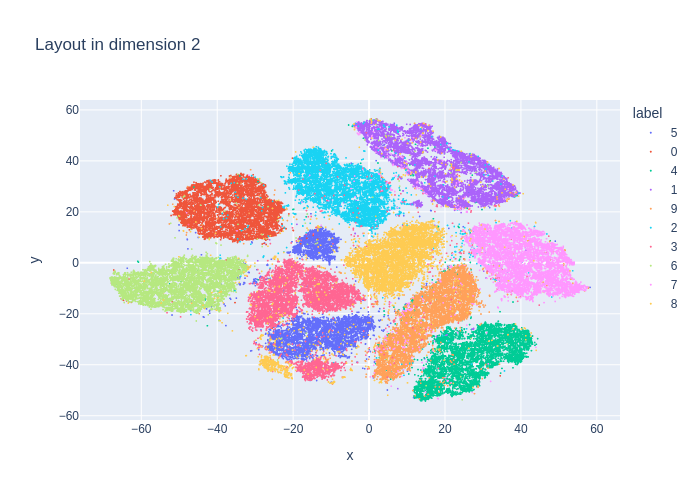

Subsampling data ...
done
Computing persistence up to dimension 1...
done
Computing Betti curve for dimension 0 ...
done


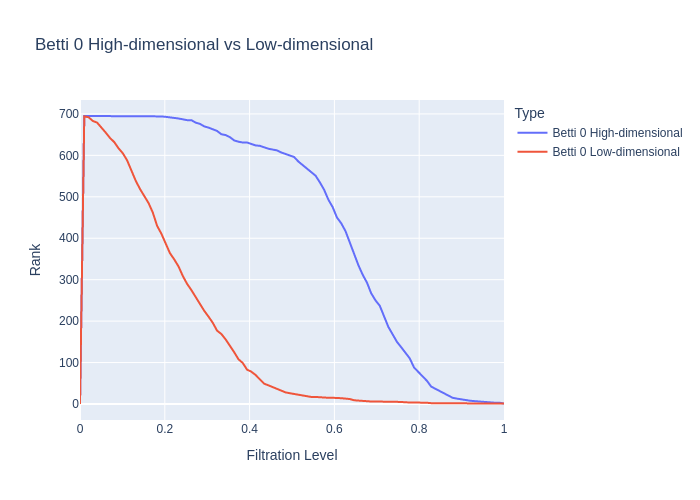

Distance (DTW) for dimension 0: 0.08449834308175401
Distance (TWED) for dimension 0: 0.08974035744054418
Distance (EMD) for dimension 0: 0.0016670486631636162
Computing Betti curve for dimension 1 ...
done


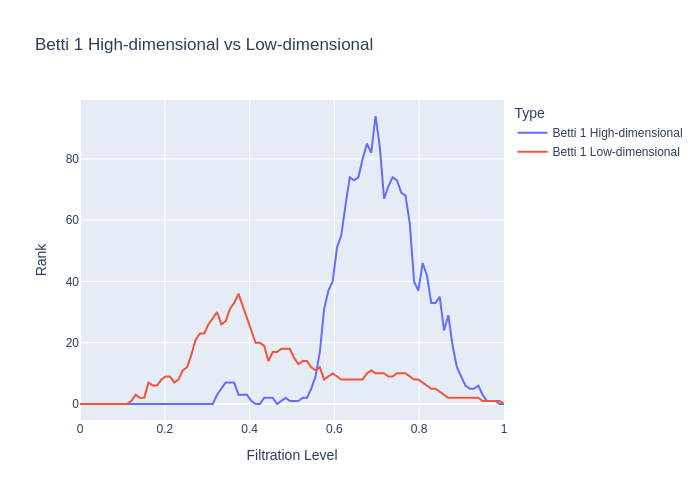

Distance (DTW) for dimension 1: 0.13988885211892596
Distance (TWED) for dimension 1: 0.05877613478374508
Distance (EMD) for dimension 1: 0.0009333667858384687
Embedding stress (scaling adjusted): 2.73955933506197
Neighborhood preservation (mean, std): (0.0593070387840271, 0.06279349327087402)


In [16]:
tred_mnist = cTSNE(n_components=2,
                   method='fft',
                   perplexity=reducer_mnist.n_neighbors,
                   n_neighbors=3*reducer_mnist.n_neighbors+1)
#
run_benchmark(tred_mnist,
              features_mnist,
              labels_mnist,
              subsample_threshold=0.1,
              rng_key=random.PRNGKey(42),
              point_size=2)

### CuML UMAP reducer

Embedding time: 5.3618 seconds


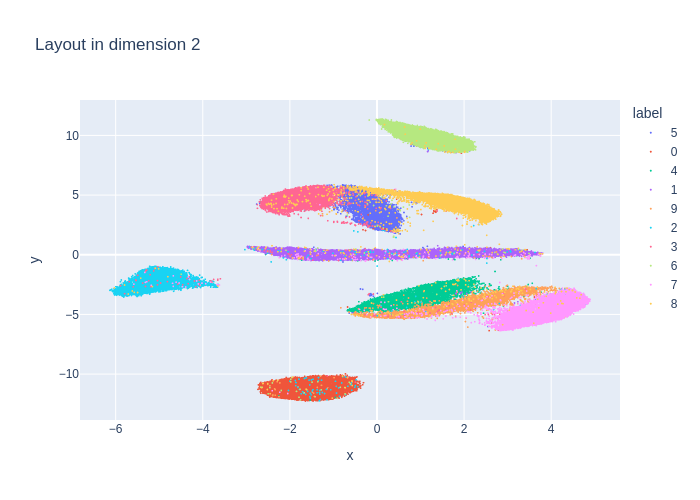

Subsampling data ...
done
Computing persistence up to dimension 1...
done
Computing Betti curve for dimension 0 ...
done


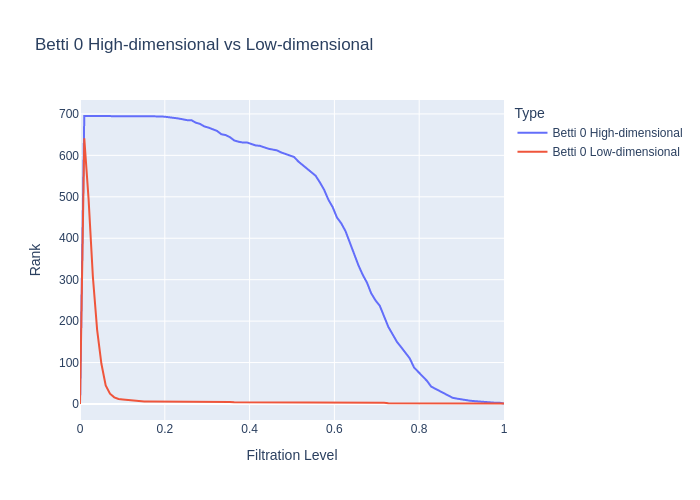

Distance (DTW) for dimension 0: 0.5212096840593137
Distance (TWED) for dimension 0: 0.18137194676649915
Distance (EMD) for dimension 0: 0.02874029685857481
Computing Betti curve for dimension 1 ...
done


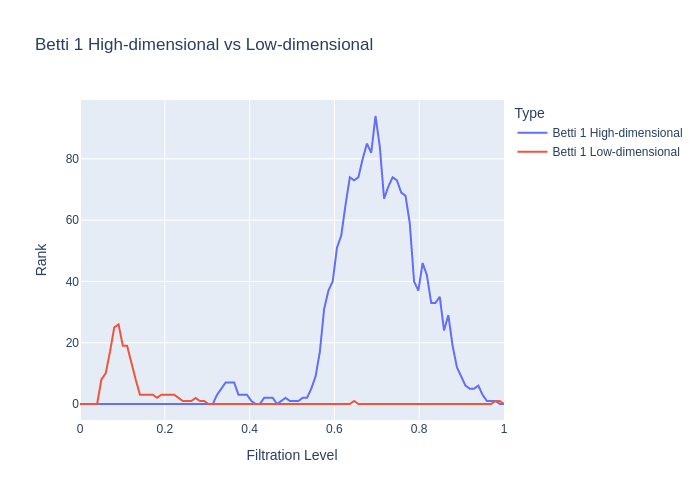

Distance (DTW) for dimension 1: 0.29174198028412385
Distance (TWED) for dimension 1: 0.056821268128316525
Distance (EMD) for dimension 1: 0.07318875781077666
Embedding stress (scaling adjusted): 2.549243975797863
Neighborhood preservation (mean, std): (0.018867995589971542, 0.020119840279221535)


In [17]:
cured_mnist = cUMAP(n_components=reducer_mnist.dimension,
                    n_neighbors=reducer_mnist.n_neighbors,
                    min_dist=reducer_mnist.min_dist,
                    spread=reducer_mnist.spread)
#
run_benchmark(cured_mnist,
              features_mnist,
              labels_mnist,
              subsample_threshold=0.1,
              rng_key=random.PRNGKey(42),
              point_size=2)

## Dataset "Forest Cover Types"

In [6]:
from sklearn.datasets import fetch_covtype
#
features_covtype, labels_covtype = fetch_covtype(return_X_y=True)
features_covtype, labels_covtype = features_covtype[::5], labels_covtype[::5]

### DiRe reducer

In [73]:
reducer_covtype  = DiRe(dimension=3,
                        n_neighbors=8,
                        init_embedding_type='random',
                        max_iter_layout=64,
                        min_dist=1e-0,
                        spread=1.0,
                        cutoff=16.0,
                        n_sample_dirs=8,
                        sample_size=8,
                        neg_ratio=8,
                        verbose=False)

100%|██████████| 64/64 [00:02<00:00, 23.92it/s]


Embedding time: 4.3105 seconds


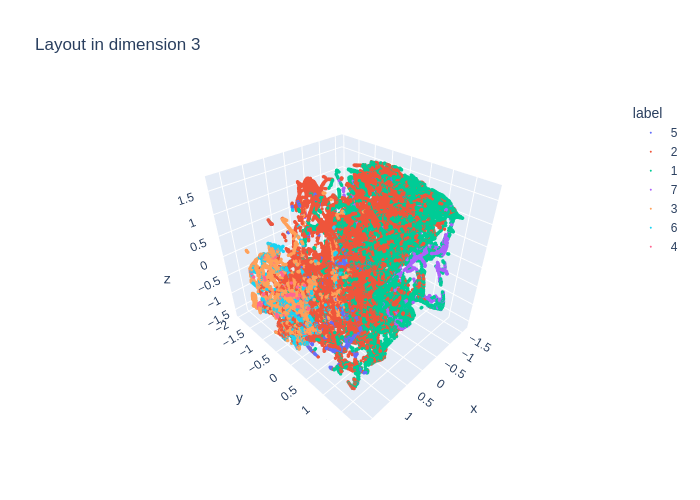

Subsampling data ...
done
Computing persistence up to dimension 1...
done
Computing Betti curve for dimension 0 ...
done


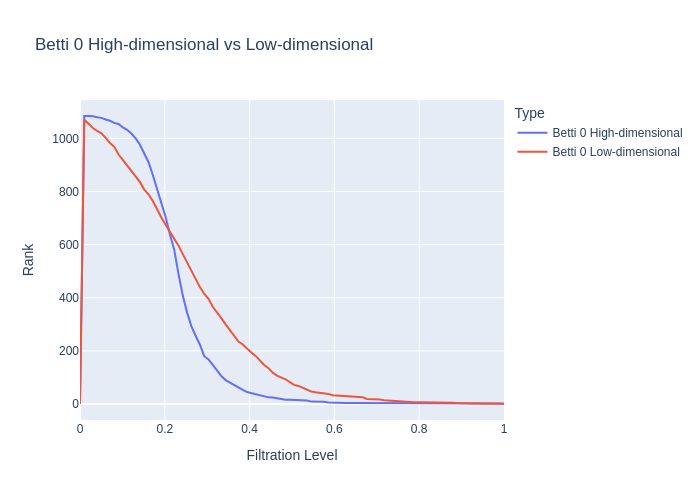

Distance (DTW) for dimension 0: 5.096556528036363
Distance (TWED) for dimension 0: 0.102730717004288
Distance (EMD) for dimension 0: 3.8099994762740343
Computing Betti curve for dimension 1 ...
done


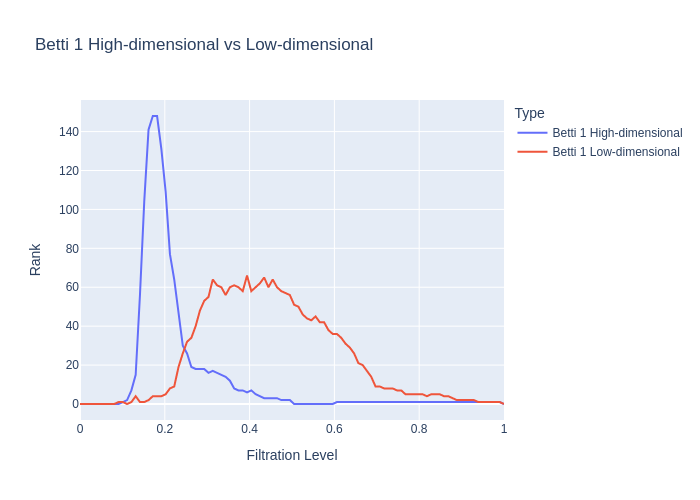

Distance (DTW) for dimension 1: 8.959024134780751
Distance (TWED) for dimension 1: 0.04688347520056111
Distance (EMD) for dimension 1: 40.57225840895987
Embedding stress (scaling adjusted): 1.7631592048186477
Neighborhood preservation (mean, std): (0.1808186173439026, 0.23746439814567566)


In [74]:
run_benchmark(reducer_covtype,
              features_covtype,
              labels_covtype,
              subsample_threshold=0.1,
              rng_key=random.PRNGKey(42),
              point_size=2)

### CuML tSNE reducer

Embedding time: 4.3139 seconds


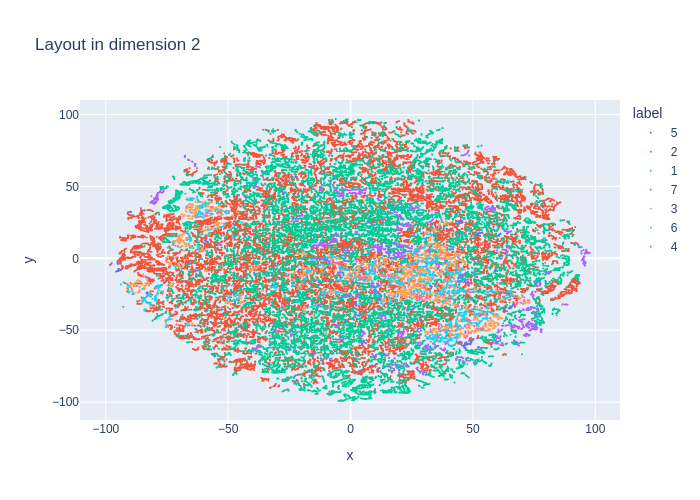

Subsampling data ...
done
Computing persistence up to dimension 1...
done
Computing Betti curve for dimension 0 ...
done


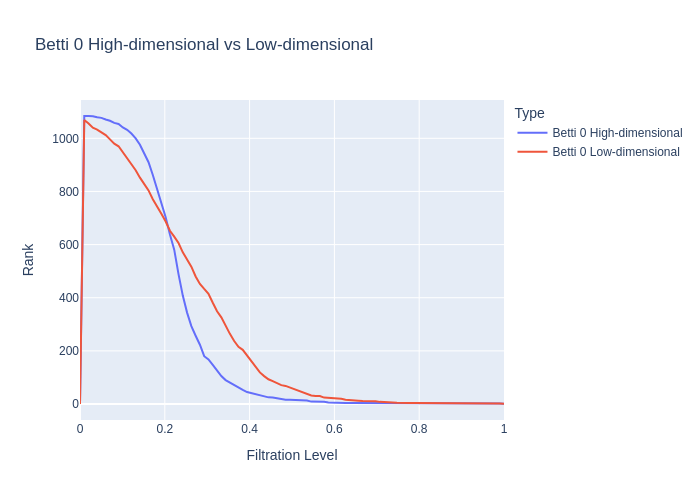

Distance (DTW) for dimension 0: 5.029571890255387
Distance (TWED) for dimension 0: 0.09522283902321135
Distance (EMD) for dimension 0: 3.6673962097182944
Computing Betti curve for dimension 1 ...
done


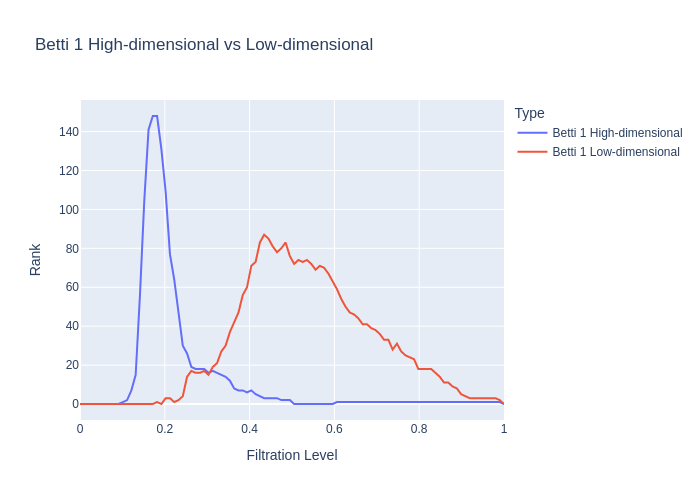

Distance (DTW) for dimension 1: 8.88414182252347
Distance (TWED) for dimension 1: 0.04618091429978452
Distance (EMD) for dimension 1: 48.87854453305688
Embedding stress (scaling adjusted): 4.166976316342156
Neighborhood preservation (mean, std): (0.06301675736904144, 0.10011459141969681)


In [75]:
tred_covtype = cTSNE(n_components=2,
                     method='fft',
                     perplexity=reducer_covtype.n_neighbors,
                     n_neighbors=3*reducer_covtype.n_neighbors+1)
#
run_benchmark(tred_covtype,
              features_covtype,
              labels_covtype,
              subsample_threshold=0.1,
              rng_key=random.PRNGKey(42),
              point_size=2)

### CuML UMAP reducer

Embedding time: 1.6610 seconds


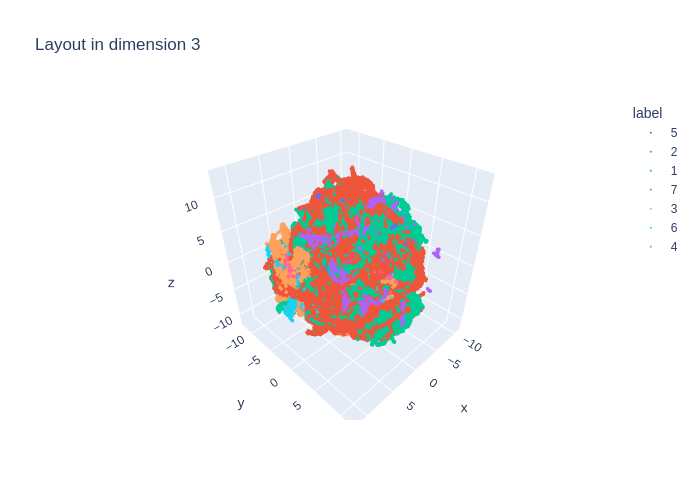

Subsampling data ...
done
Computing persistence up to dimension 1...
done
Computing Betti curve for dimension 0 ...
done


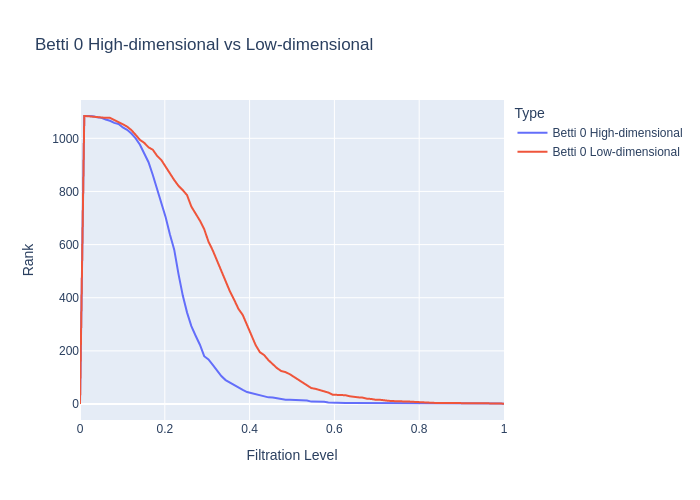

Distance (DTW) for dimension 0: 5.038763084519145
Distance (TWED) for dimension 0: 0.08825951509237558
Distance (EMD) for dimension 0: 4.697370209504844
Computing Betti curve for dimension 1 ...
done


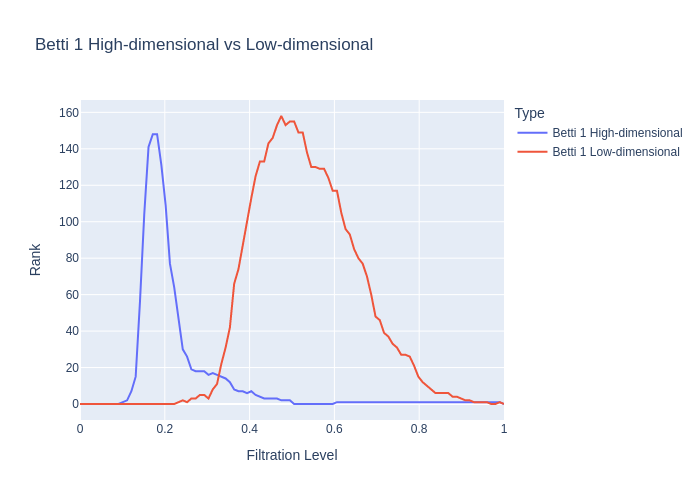

Distance (DTW) for dimension 1: 8.966028003113019
Distance (TWED) for dimension 1: 0.04630639684300203
Distance (EMD) for dimension 1: 78.09650859787327
Embedding stress (scaling adjusted): 0.8468874423030096
Neighborhood preservation (mean, std): (0.07678942382335663, 0.14914672076702118)


In [76]:
cured_covtype = cUMAP(n_components=reducer_covtype.dimension,
                      n_neighbors=reducer_covtype.n_neighbors,
                      min_dist=reducer_covtype.min_dist,
                      spread=reducer_covtype.spread)
#
run_benchmark(cured_covtype,
              features_covtype,
              labels_covtype,
              subsample_threshold=0.1,
              rng_key=random.PRNGKey(42),
              point_size=2)

## Dataset "Disk Uniform"

In [6]:
def rand_point_disk(n, num=1):
  prepts = np.random.randn(num, n)
  prenorms = np.linalg.norm(prepts, axis=1).reshape(-1, 1)
  rads = np.sqrt(np.random.rand(num)).reshape(-1, 1)
  pts = prepts * rads/prenorms
  return pts

In [7]:
features_disk, labels_disk = rand_point_disk(2, 10000), None

### DiRe reducer

In [8]:
reducer_disk = DiRe(dimension=2,
                    n_neighbors=64,
                    init_embedding_type='spectral',
                    max_iter_layout=16,
                    min_dist=1e-4,
                    spread=1.0,
                    cutoff=1.0,
                    n_sample_dirs=8,
                    sample_size=32,
                    neg_ratio=8,
                    verbose=False,)

100%|██████████| 16/16 [00:00<00:00, 34.72it/s]


Embedding time: 1.7449 seconds


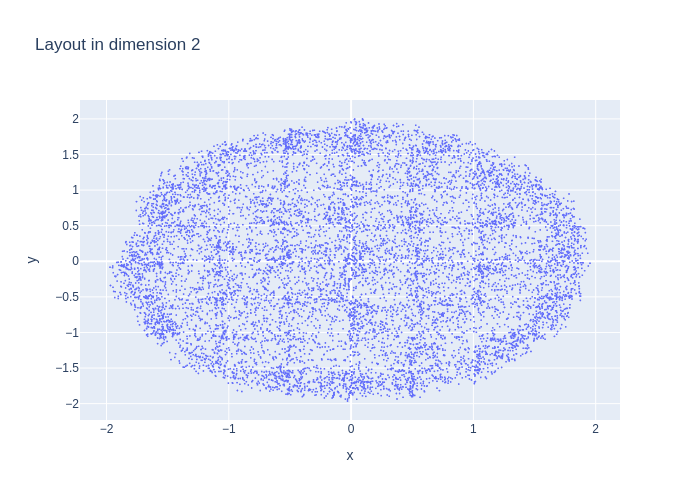

Subsampling data ...
done
Computing persistence up to dimension 1...
done
Computing Betti curve for dimension 0 ...
done


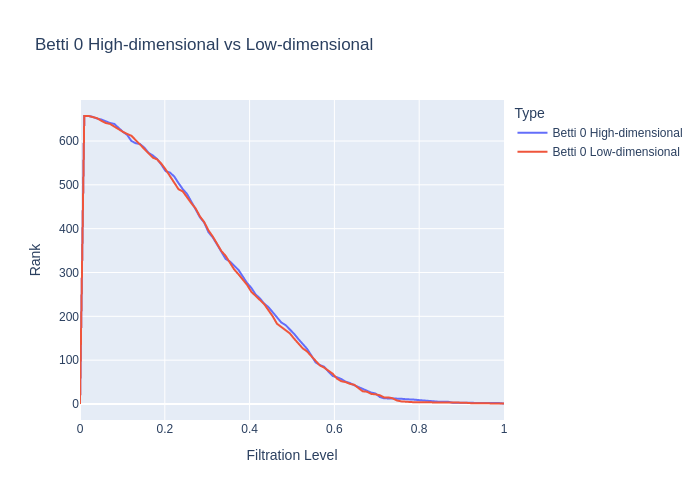

Distance (DTW) for dimension 0: 0.08475013842545952
Distance (TWED) for dimension 0: 0.16809680508268482
Distance (EMD) for dimension 0: 4.055377520405712e-07
Computing Betti curve for dimension 1 ...
done


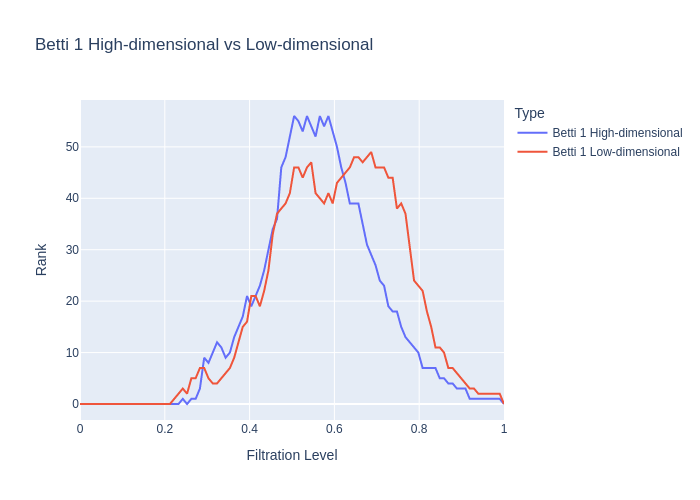

Distance (DTW) for dimension 1: 0.08254792757974738
Distance (TWED) for dimension 1: 0.08482906475141355
Distance (EMD) for dimension 1: 6.597969647584041e-06
Embedding stress (scaling adjusted): 1.5819666614867123
Neighborhood preservation (mean, std): (0.06494834274053574, 0.0503959059715271)


In [18]:
run_benchmark(reducer_disk,
              features_disk,
              labels_disk,
              subsample_threshold=0.25,
              rng_key=random.PRNGKey(42),
              point_size=2)

### CuML tSNE reducer

Embedding time: 1.1802 seconds


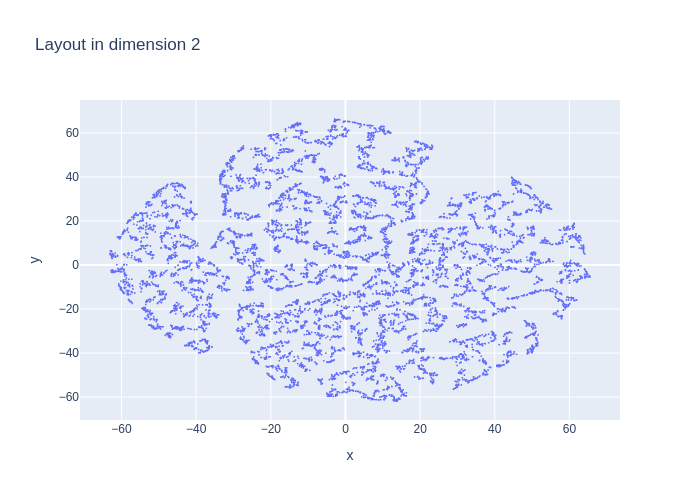

Subsampling data ...
done
Computing persistence up to dimension 1...
done
Computing Betti curve for dimension 0 ...
done


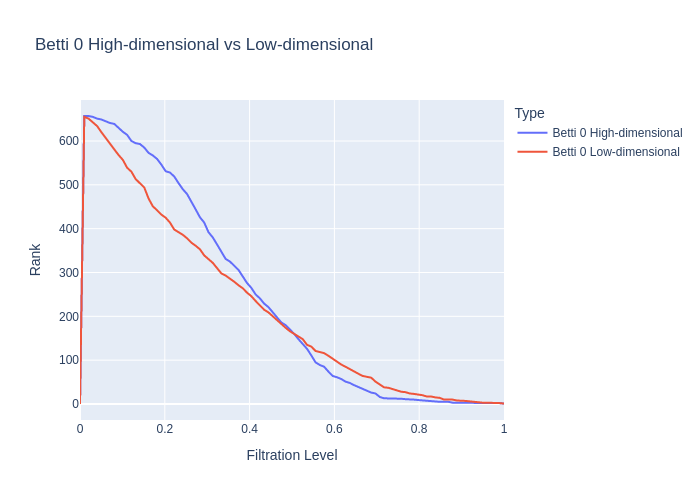

Distance (DTW) for dimension 0: 0.23867938060597202
Distance (TWED) for dimension 0: 0.22588104366792316
Distance (EMD) for dimension 0: 0.0021848142911592965
Computing Betti curve for dimension 1 ...
done


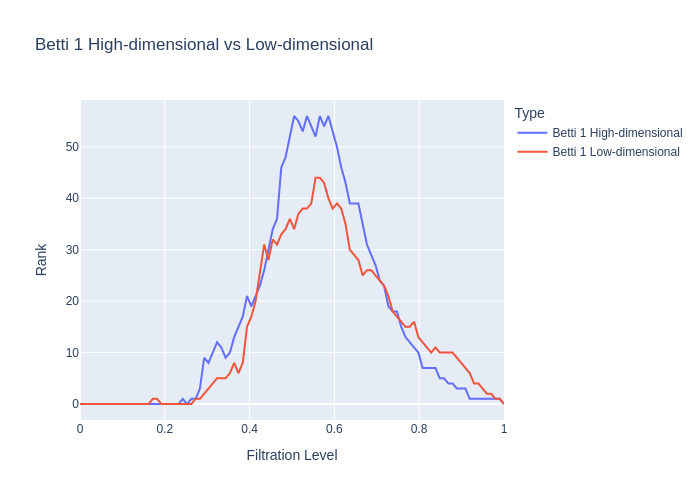

Distance (DTW) for dimension 1: 0.3318310908102346
Distance (TWED) for dimension 1: 0.07969838895686406
Distance (EMD) for dimension 1: 0.0315176525941745
Embedding stress (scaling adjusted): 0.011669480944962401
Neighborhood preservation (mean, std): (0.18059000372886658, 0.1323181837797165)


In [17]:
tred_disk = cTSNE(n_components=2,
                  method='fft',
                  perplexity=25,
                  n_neighbors=3*25+1)
#
run_benchmark(tred_disk,
              features_disk,
              labels_disk,
              subsample_threshold=0.25,
              rng_key=random.PRNGKey(42),
              point_size=2)

### CuML UMAP reducer

Embedding time: 0.3772 seconds


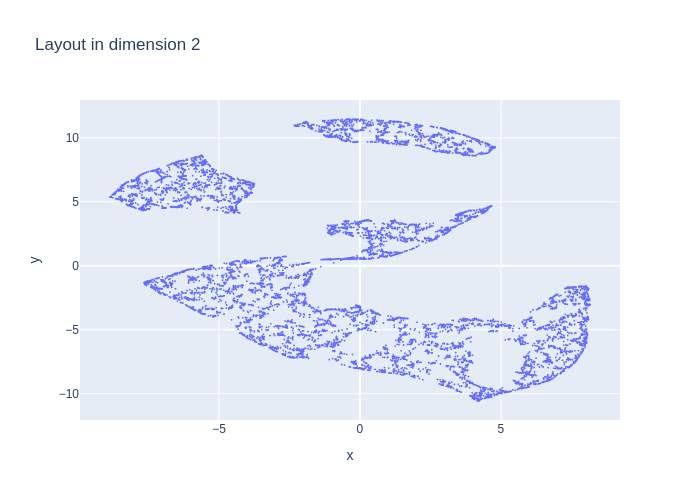

Subsampling data ...
done
Computing persistence up to dimension 1...
done
Computing Betti curve for dimension 0 ...
done


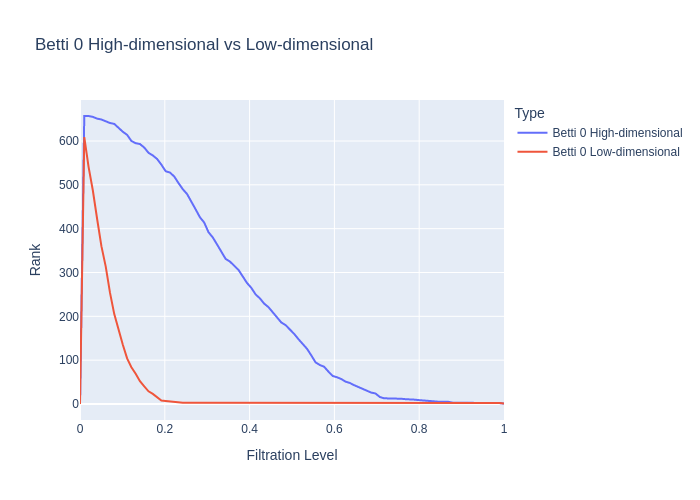

Distance (DTW) for dimension 0: 0.47011055795315126
Distance (TWED) for dimension 0: 0.4015927563381566
Distance (EMD) for dimension 0: 0.0008440529530919268
Computing Betti curve for dimension 1 ...
done


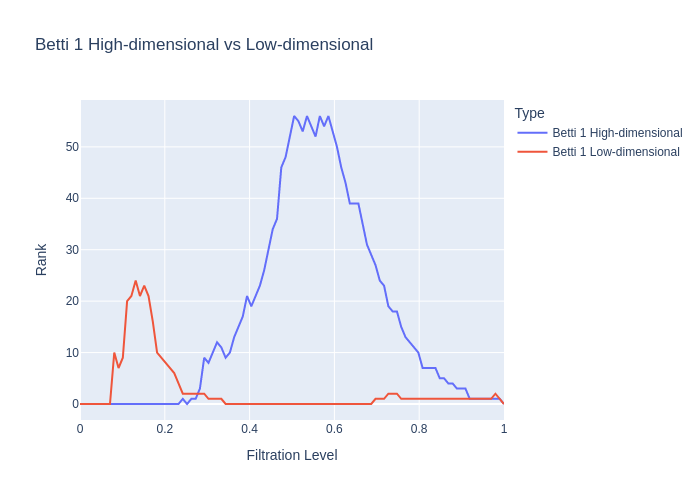

Distance (DTW) for dimension 1: 0.34752724076409885
Distance (TWED) for dimension 1: 0.112096491119741
Distance (EMD) for dimension 1: 0.009450351454648105
Embedding stress (scaling adjusted): 0.3086955732001859
Neighborhood preservation (mean, std): (0.19493423402309418, 0.13582251965999603)


In [16]:
cured_disk = cUMAP(n_components=reducer_disk.dimension,
                   n_neighbors=reducer_disk.n_neighbors,
                   min_dist=reducer_disk.min_dist,
                   spread=reducer_disk.spread)
#
run_benchmark(cured_disk,
              features_disk,
              labels_disk,
              subsample_threshold=0.25,
              rng_key=random.PRNGKey(42),
              point_size=2)

## Dataset "Sphere Uniform"

In [21]:
def rand_point_sphere(n, num=1):
  prepts = np.random.randn(num, n)
  prenorms = np.linalg.norm(prepts, axis=1).reshape(-1, 1)
  pts = prepts/prenorms
  return pts

In [22]:
features_sphere, labels_sphere = rand_point_sphere(3, 10000), None

### DiRe reducer

In [27]:
reducer_sphere = DiRe(dimension=3,
                      n_neighbors=64,
                      init_embedding_type='spectral',
                      max_iter_layout=32,
                      min_dist=1e-4,
                      spread=2.0,
                      cutoff=2.0,
                      n_sample_dirs=8,
                      sample_size=32,
                      neg_ratio=8,
                      verbose=False,)

100%|██████████| 32/32 [00:01<00:00, 28.20it/s]


Embedding time: 2.2765 seconds


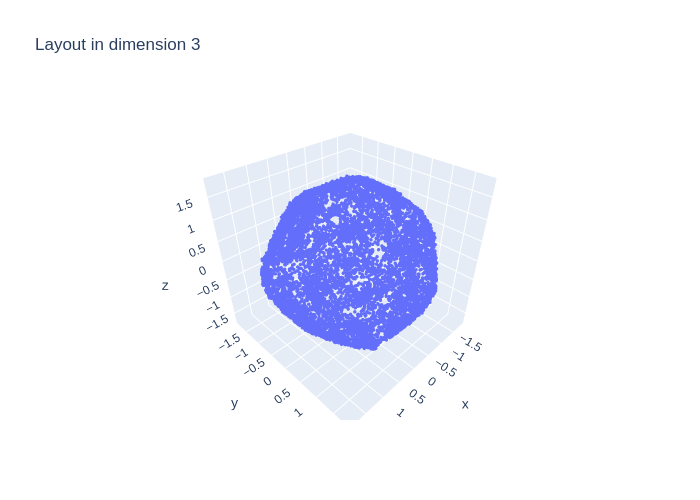

Subsampling data ...
done
Computing persistence up to dimension 1...
done
Computing Betti curve for dimension 0 ...
done


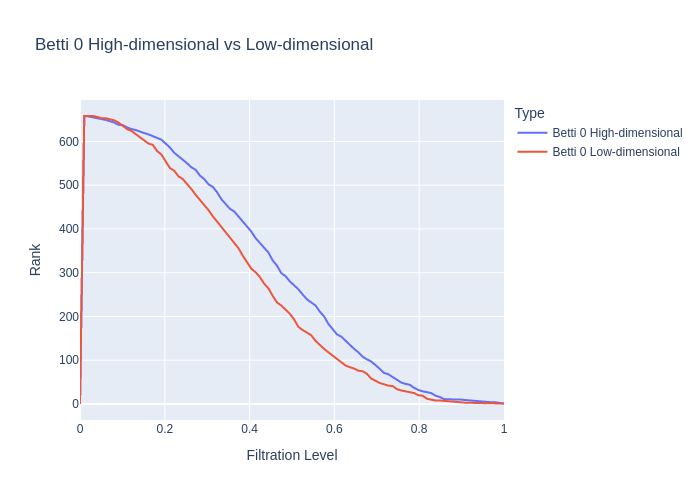

Distance (DTW) for dimension 0: 0.08364150564485001
Distance (TWED) for dimension 0: 0.1649851401956165
Distance (EMD) for dimension 0: 9.953259838635951e-07
Computing Betti curve for dimension 1 ...
done


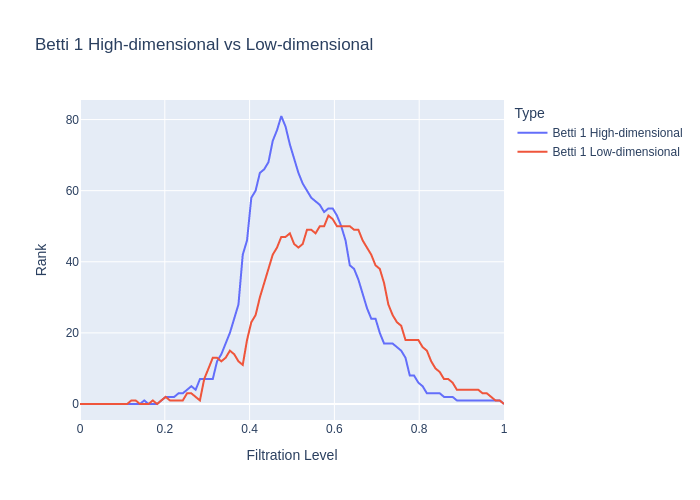

Distance (DTW) for dimension 1: 0.13174289788548996
Distance (TWED) for dimension 1: 0.1035090465026143
Distance (EMD) for dimension 1: 2.0339730980440416e-05
Embedding stress (scaling adjusted): 0.45246578715752933
Neighborhood preservation (mean, std): (0.2553381621837616, 0.15191778540611267)


In [28]:
run_benchmark(reducer_sphere,
              features_sphere,
              labels_sphere,
              subsample_threshold=0.25,
              rng_key=random.PRNGKey(42),
              point_size=2)

### CuML tSNE reducer

Embedding time: 1.1641 seconds


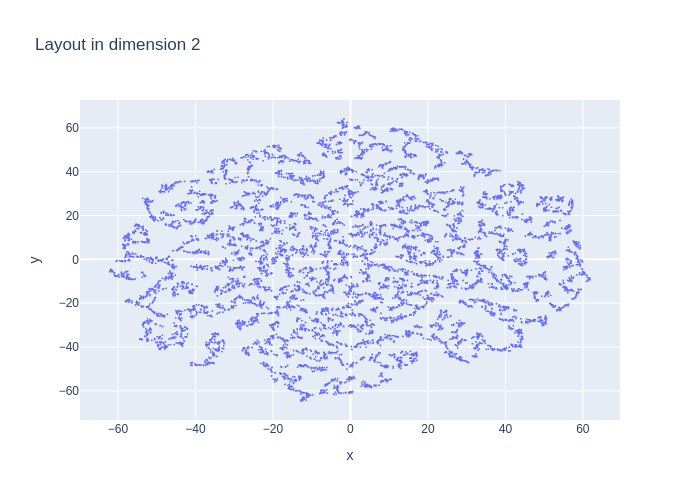

Subsampling data ...
done
Computing persistence up to dimension 1...
done
Computing Betti curve for dimension 0 ...
done


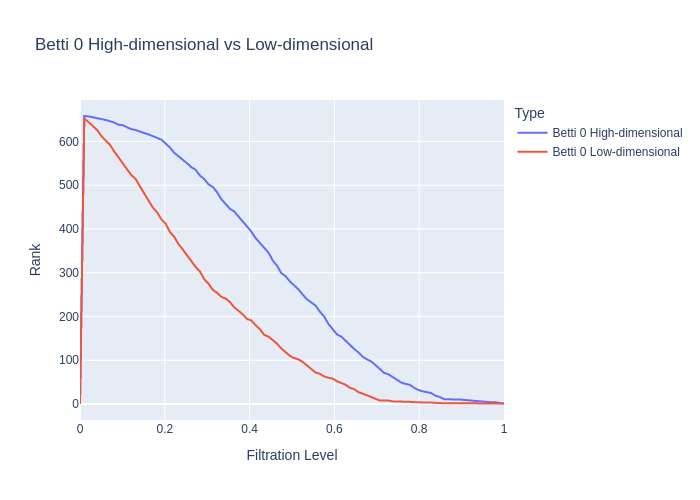

Distance (DTW) for dimension 0: 0.2306231787739378
Distance (TWED) for dimension 0: 0.1939598231927894
Distance (EMD) for dimension 0: 0.002998968537814851
Computing Betti curve for dimension 1 ...
done


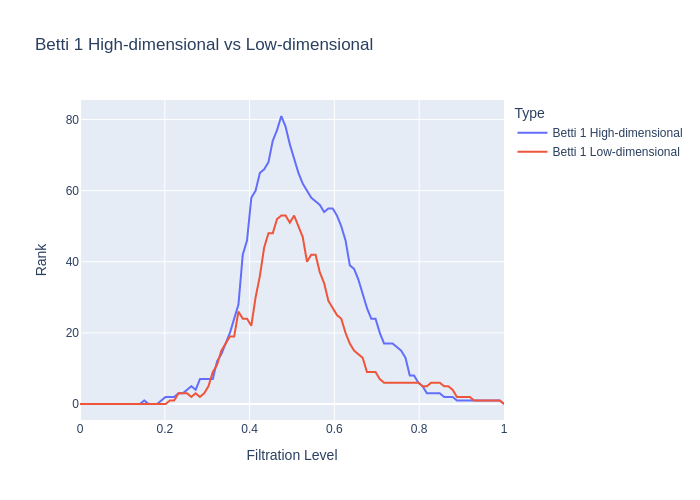

Distance (DTW) for dimension 1: 0.3891540374749071
Distance (TWED) for dimension 1: 0.08283585722808244
Distance (EMD) for dimension 1: 0.03886316051599843
Embedding stress (scaling adjusted): 0.023613393470310686
Neighborhood preservation (mean, std): (0.16033117473125458, 0.12029290944337845)


In [31]:
tred_sphere = cTSNE(n_components=2,
                    method='fft',
                    perplexity=25,
                    n_neighbors=3*25+1)
#
run_benchmark(tred_sphere,
              features_sphere,
              labels_sphere,
              subsample_threshold=0.25,
              rng_key=random.PRNGKey(42),
              point_size=2)

### CuML UMAP reducer

Embedding time: 0.4084 seconds


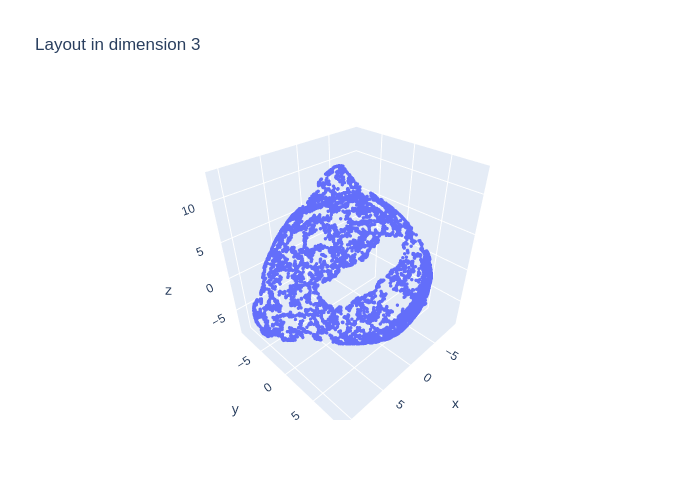

Subsampling data ...
done
Computing persistence up to dimension 1...
done
Computing Betti curve for dimension 0 ...
done


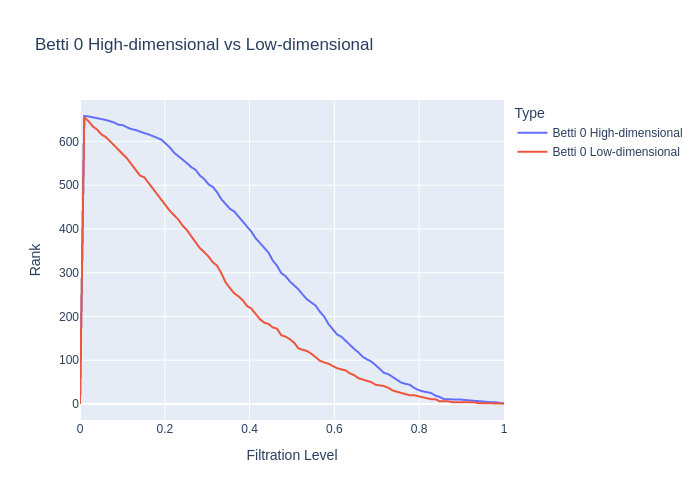

Distance (DTW) for dimension 0: 0.116500072199931
Distance (TWED) for dimension 0: 0.20237089520762402
Distance (EMD) for dimension 0: 0.00010537231761457888
Computing Betti curve for dimension 1 ...
done


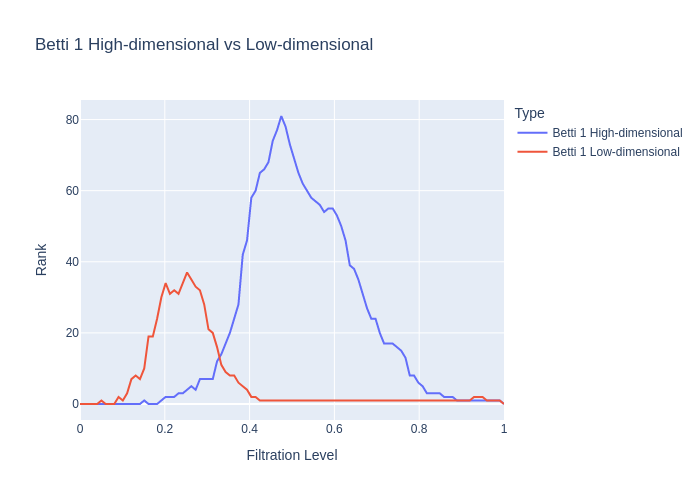

Distance (DTW) for dimension 1: 0.38912487252842276
Distance (TWED) for dimension 1: 0.1027918834166768
Distance (EMD) for dimension 1: 0.006700985177639384
Embedding stress (scaling adjusted): 0.15719435929840309
Neighborhood preservation (mean, std): (0.20496723055839539, 0.13852395117282867)


In [30]:
cured_sphere = cUMAP(n_components=reducer_sphere.dimension,
                     n_neighbors=reducer_sphere.n_neighbors,
                     min_dist=reducer_sphere.min_dist,
                     spread=reducer_sphere.spread)
#
run_benchmark(cured_sphere,
              features_sphere,
              labels_sphere,
              subsample_threshold=0.25,
              rng_key=random.PRNGKey(42),
              point_size=2)

## Dataset "Ellipsoid Uniform"

In [32]:
class elgen:
  def __init__(self, a):
    a = np.array(a)
    themat = np.diag(1/(a * a))
    L = np.linalg.inv(np.linalg.cholesky(themat).T)
    self.L = L

  def __call__(self, ar):
    return (self.L @ ar.T).T

def rand_point_ell(a, n, num=1):
  spts = rand_point_sphere(n, num)
  eg = elgen(a)
  return eg(spts)

In [33]:
features_ell, labels_ell = rand_point_ell([1,2,4], 3, 10000), None

### DiRe reducer

In [34]:
reducer_ell = DiRe(dimension=3,
                   n_neighbors=64,
                   init_embedding_type='spectral',
                   max_iter_layout=64,
                   min_dist=1e-4,
                   spread=1.0,
                   cutoff=4.0,
                   n_sample_dirs=8,
                   sample_size=32,
                   neg_ratio=8,
                   verbose=False,)

100%|██████████| 64/64 [00:01<00:00, 34.79it/s]


Embedding time: 3.1876 seconds


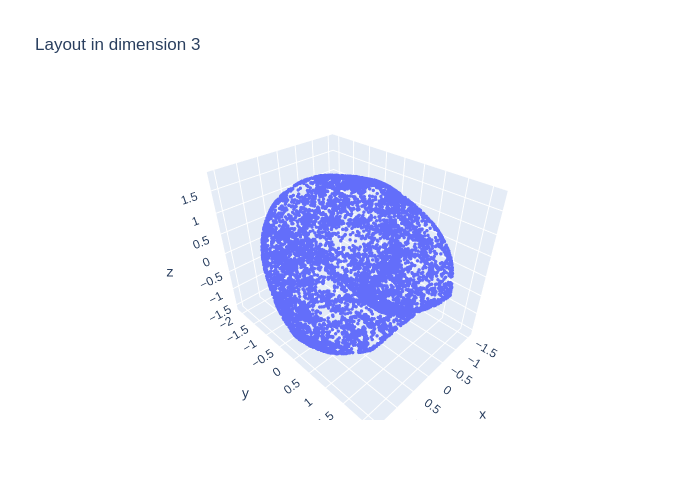

Subsampling data ...
done
Computing persistence up to dimension 1...
done
Computing Betti curve for dimension 0 ...
done


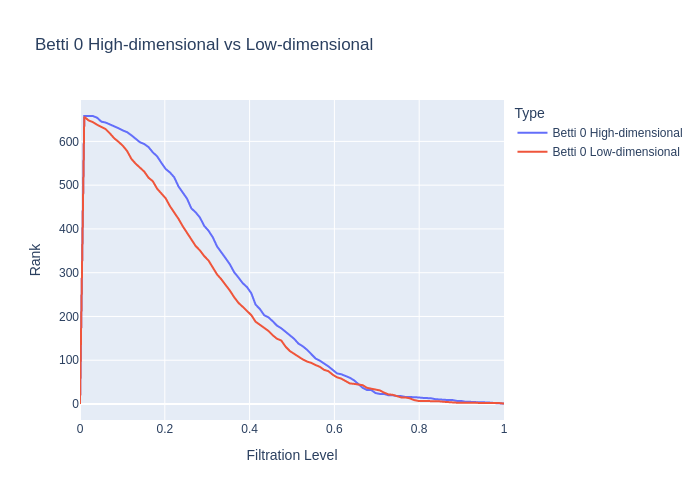

Distance (DTW) for dimension 0: 0.09079157917267366
Distance (TWED) for dimension 0: 0.18521730890533802
Distance (EMD) for dimension 0: 3.1081364259529427e-07
Computing Betti curve for dimension 1 ...
done


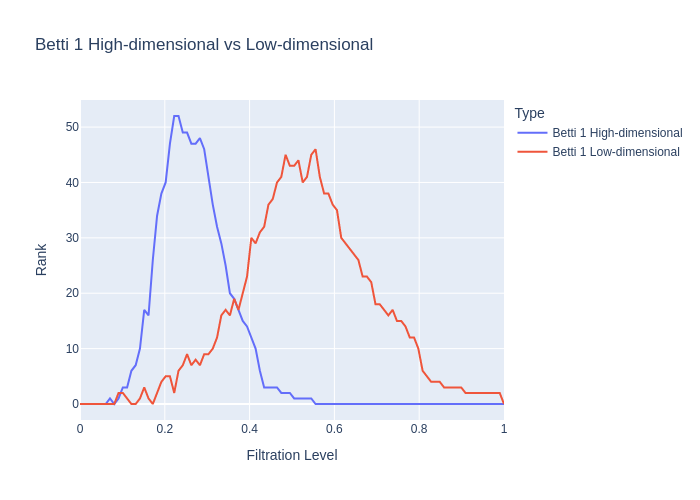

Distance (DTW) for dimension 1: 0.05677600883530758
Distance (TWED) for dimension 1: 0.09027483750873966
Distance (EMD) for dimension 1: 1.1667756512723174e-06
Embedding stress (scaling adjusted): 1.277544762873262
Neighborhood preservation (mean, std): (0.1948407143354416, 0.12881237268447876)


In [35]:
run_benchmark(reducer_ell,
              features_ell,
              labels_ell,
              subsample_threshold=0.25,
              rng_key=random.PRNGKey(42),
              point_size=2)

### CuML tSNE reducer

Embedding time: 1.1119 seconds


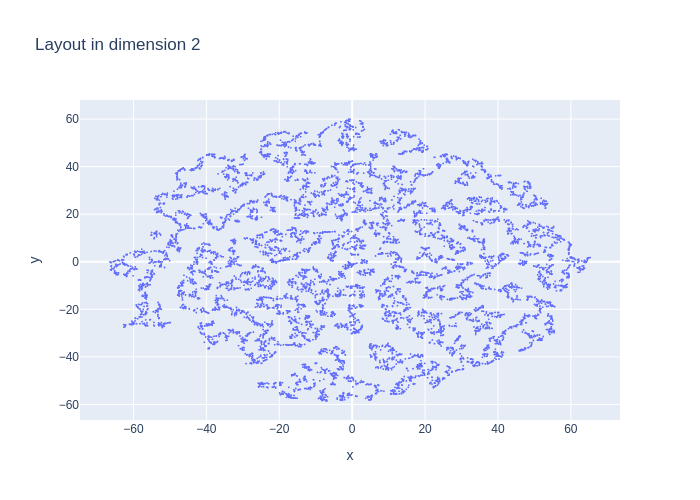

Subsampling data ...
done
Computing persistence up to dimension 1...
done
Computing Betti curve for dimension 0 ...
done


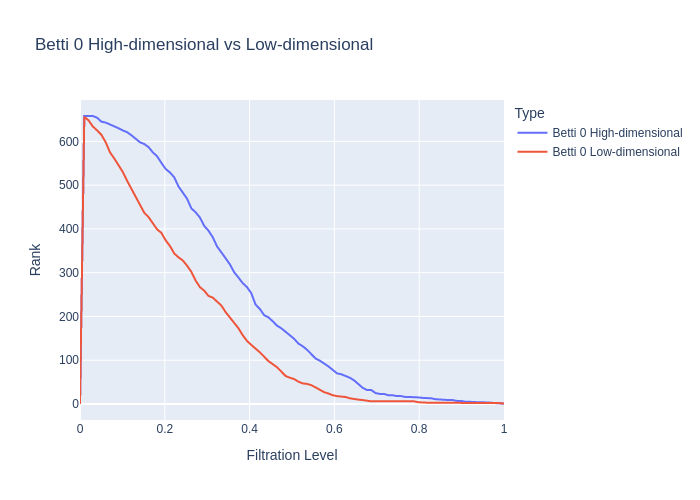

Distance (DTW) for dimension 0: 0.2654020156961965
Distance (TWED) for dimension 0: 0.22662799998480057
Distance (EMD) for dimension 0: 0.0024086254540882693
Computing Betti curve for dimension 1 ...
done


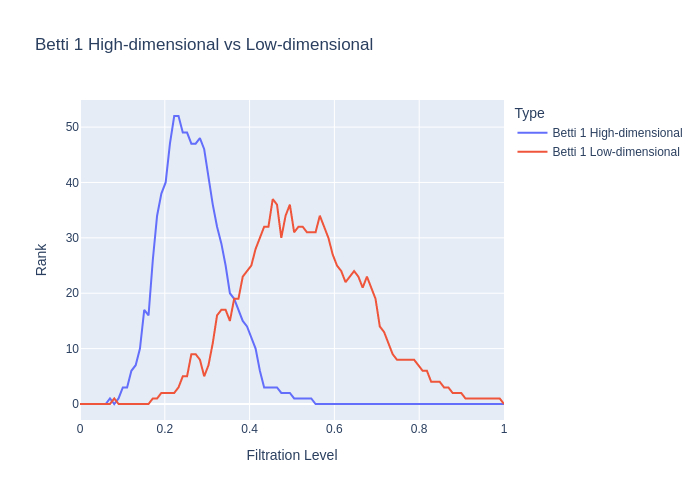

Distance (DTW) for dimension 1: 0.4524178228277303
Distance (TWED) for dimension 1: 0.09595606466211698
Distance (EMD) for dimension 1: 0.029760295772106503
Embedding stress (scaling adjusted): 0.1143573921127794
Neighborhood preservation (mean, std): (0.157441183924675, 0.1192617267370224)


In [37]:
tred_ell = cTSNE(n_components=2,
                 method='fft',
                 perplexity=25,
                 n_neighbors=3*25+1)
#
run_benchmark(tred_ell,
              features_ell,
              labels_ell,
              subsample_threshold=0.25,
              rng_key=random.PRNGKey(42),
              point_size=2)

### CuML UMAP reducer

Embedding time: 0.4103 seconds


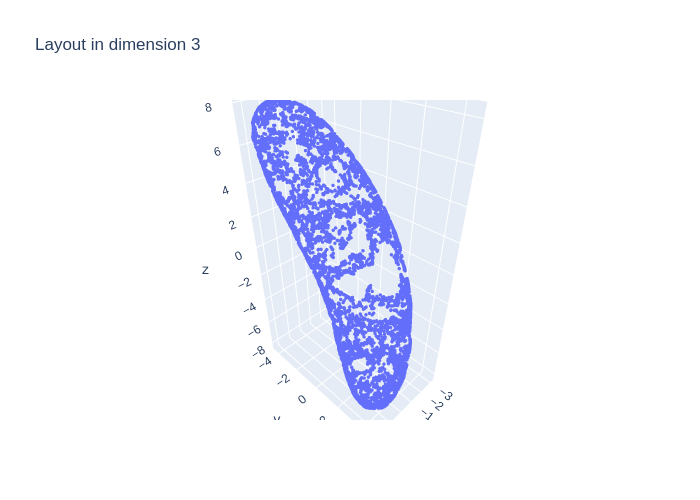

Subsampling data ...
done
Computing persistence up to dimension 1...
done
Computing Betti curve for dimension 0 ...
done


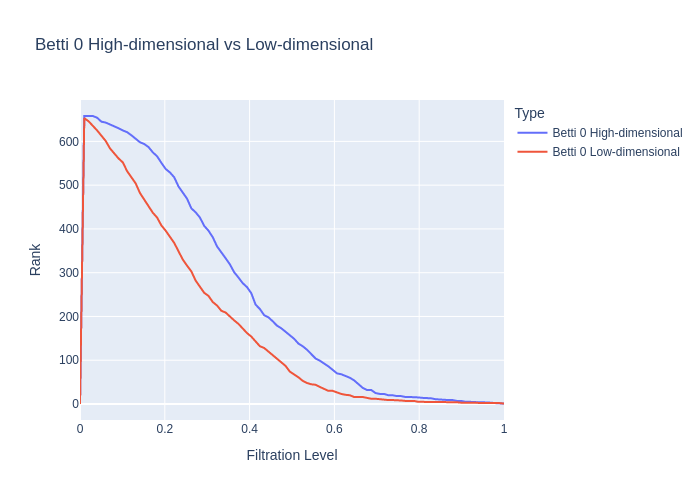

Distance (DTW) for dimension 0: 0.09528361581733381
Distance (TWED) for dimension 0: 0.17666630726380106
Distance (EMD) for dimension 0: 1.0903182081455997e-05
Computing Betti curve for dimension 1 ...
done


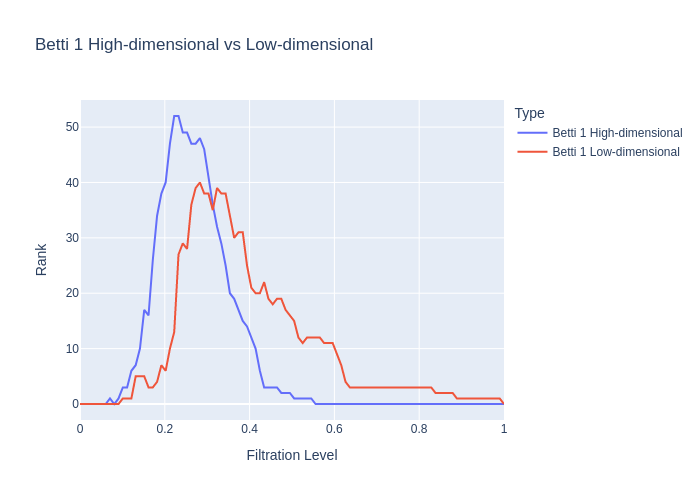

Distance (DTW) for dimension 1: 0.09700484016648571
Distance (TWED) for dimension 1: 0.08095802871169747
Distance (EMD) for dimension 1: 0.0002190714641985348
Embedding stress (scaling adjusted): 1.0402593218996332
Neighborhood preservation (mean, std): (0.2195407897233963, 0.14911168813705444)


In [36]:
cured_ell = cUMAP(n_components=reducer_ell.dimension,
                  n_neighbors=reducer_ell.n_neighbors,
                  min_dist=reducer_ell.min_dist,
                  spread=reducer_ell.spread)
#
run_benchmark(cured_ell,
              features_ell,
              labels_ell,
              subsample_threshold=0.25,
              rng_key=random.PRNGKey(42),
              point_size=2)